# Scikit-learn
## Overview
Scikit learn is a free open source machine learning library for the Python programming language. It offers both supervised and unsupervised learning algorithms while being focused on modelling data.

# Mean-Shift Clustering Algorithm



# Overview
Meanshift is a popular unsupervised clustering algorithm. It may also be reffered to as the Mode-seeking algorithm as it assigns data points to clusters iteratively by shifting points towards the mode. The mode is the region containing the highest density of data points. Some examples of where the Mean-Shift algorithm is applied are the fields of computer vision, image processing and search engines.

## Advantages
- Meanshift is Model-Free as it does not need to assume any prior shape on data clusters.
- Only needs the window size (bandwidth) as a single parameter h
- Does not need a predetermined number of clusters as it uses the desnisty of points to generate the number of clusters.

## Disadvantages
- Output depends on window size
- It is cumputationally expensive as its process is calculation intensive.
- Excecution time can be rather slow for problems with a large nuber of data points

## How it works
1. Start with data points assigned to their own clusters
2. Computes all the centroids
3. Updates the location of the newly created centroids.
4. This proccess will be repeated moving the centroids to the higher density region
5. Finnaly, the process will be stopped once the centroids can no longer be moved further

In [1]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [2]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

In [3]:
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


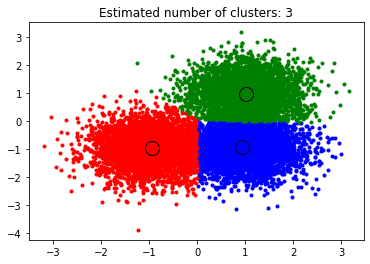

In [4]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()